In [ ]:
# name-Rohith Ramesh

In [ ]:
# student no- 

In [7]:
import numpy as np

In [8]:
import matplotlib.pyplot as plt

In [9]:
from sklearn.datasets import make_moons, make_circles, make_blobs

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
from sklearn.svm import SVC

In [13]:
from sklearn.pipeline import Pipeline

In [14]:
from sklearn.metrics import accuracy_score, classification_report

In [15]:
def plot_decision_boundary(clf, X, y, title="Decision boundary"):
    """
    clf : trained classifier (must have .predict)
    X   : 2D input features, shape (n_samples, 2)
    y   : labels (0 or 1)
    """
    # setting up a grid of points
    x_min, x_max = X[:, 0].min() - 0.5,X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5,X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(
        np.linspace(x_min,x_max,300),
        np.linspace(y_min,y_max,300)
    )

    # Flatten grid, predict class for each point, reshape back
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    Z = clf.predict(grid_points)
    Z = Z.reshape(xx.shape)
    # Plot
    plt.figure(figsize=(6, 5))
    plt.contourf(xx, yy, Z, alpha=0.3)  # decision regions
    # Use different markers for classes (better accessibility)
    for label, marker in zip(np.unique(y), ['o', 's']):
        plt.scatter(X[y == label, 0], X[y == label, 1],
                    marker=marker, edgecolor='k', label=f"Class {label}")
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [16]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

# Creating moons dataset
X, y = make_moons(n_samples=500, noise=0.2, random_state=42)

# Splittingw2yuthg train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (350, 2)
Test shape: (150, 2)


In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Linear SVM pipeline
linear_svm = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="linear", C=1.0, random_state=42))
])

linear_svm.fit(X_train, y_train)

y_pred_train = linear_svm.predict(X_train)
y_pred_test = linear_svm.predict(X_test)

print("Train accuracy:", accuracy_score(y_train, y_pred_train))
print("Test accuracy :", accuracy_score(y_test, y_pred_test))


Train accuracy: 0.8571428571428571
Test accuracy : 0.8666666666666667


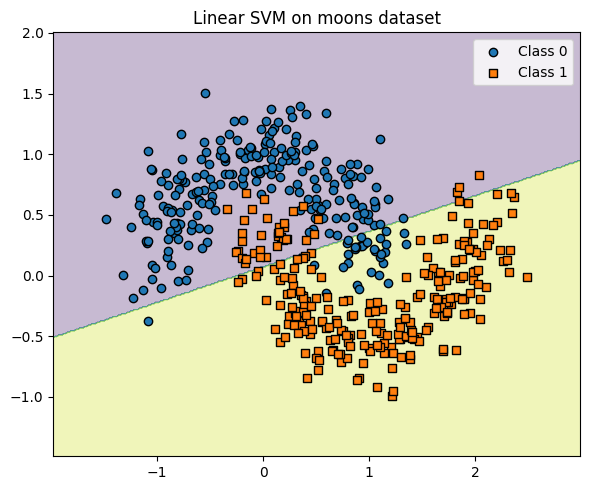

In [18]:
plot_decision_boundary(linear_svm, X, y, title="Linear SVM on moons dataset")

RBF SVM - Train accuracy: 0.9771428571428571
RBF SVM - Test accuracy : 0.98


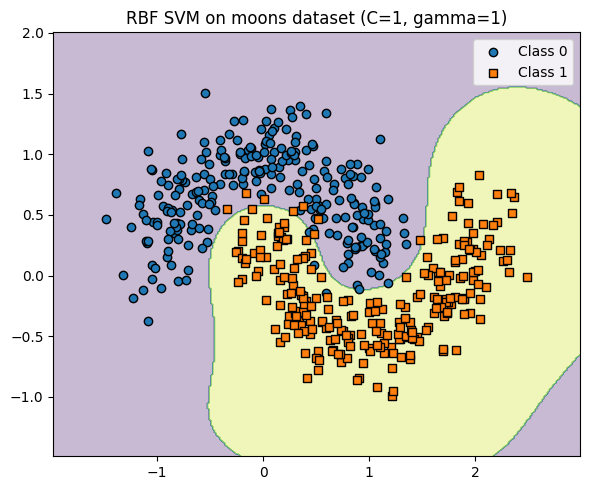

In [19]:
# RBF kernel SVM
rbf_svm = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="rbf", C=1.0, gamma=1.0, random_state=42))
])

rbf_svm.fit(X_train, y_train)

y_pred_train_rbf = rbf_svm.predict(X_train)
y_pred_test_rbf = rbf_svm.predict(X_test)

print("RBF SVM - Train accuracy:", accuracy_score(y_train, y_pred_train_rbf))
print("RBF SVM - Test accuracy :", accuracy_score(y_test, y_pred_test_rbf))

plot_decision_boundary(rbf_svm, X, y,
                       title="RBF SVM on moons dataset (C=1, gamma=1)")



RBF SVM with C=0.1, gamma=0.1
  Train accuracy: 0.8571428571428571
  Test accuracy : 0.88


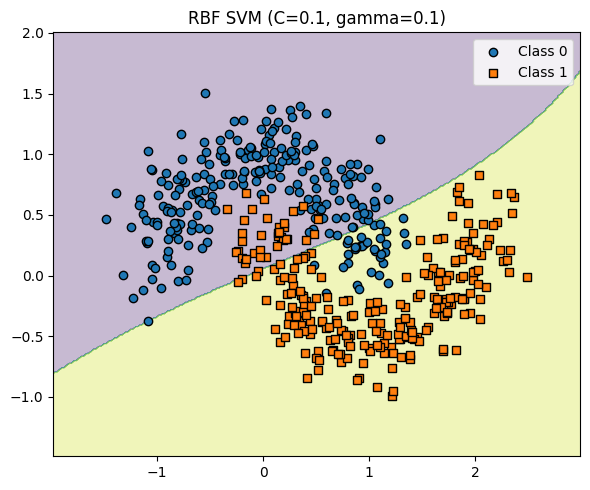


RBF SVM with C=0.1, gamma=1
  Train accuracy: 0.9571428571428572
  Test accuracy : 0.9733333333333334


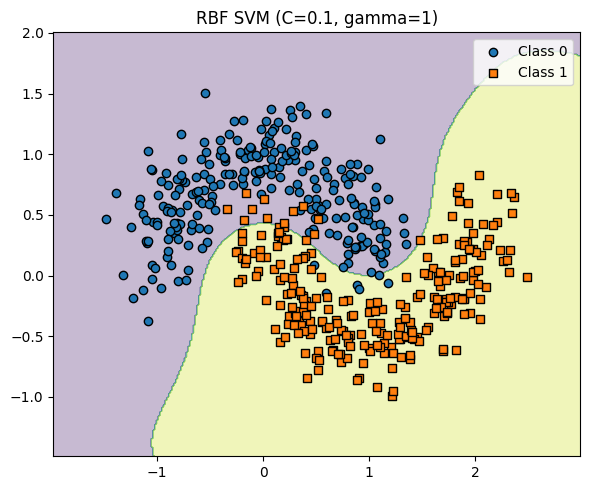


RBF SVM with C=0.1, gamma=5
  Train accuracy: 0.9771428571428571
  Test accuracy : 0.9733333333333334


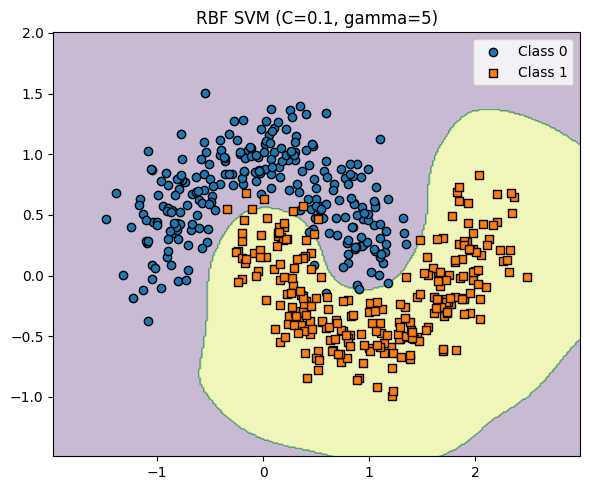


RBF SVM with C=1, gamma=0.1
  Train accuracy: 0.8685714285714285
  Test accuracy : 0.88


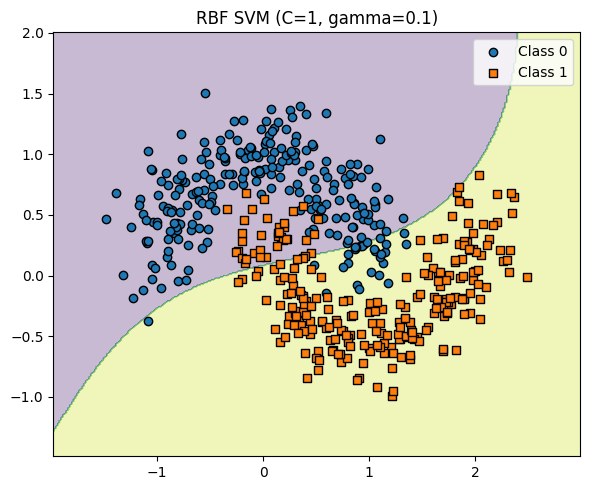


RBF SVM with C=1, gamma=1
  Train accuracy: 0.9771428571428571
  Test accuracy : 0.98


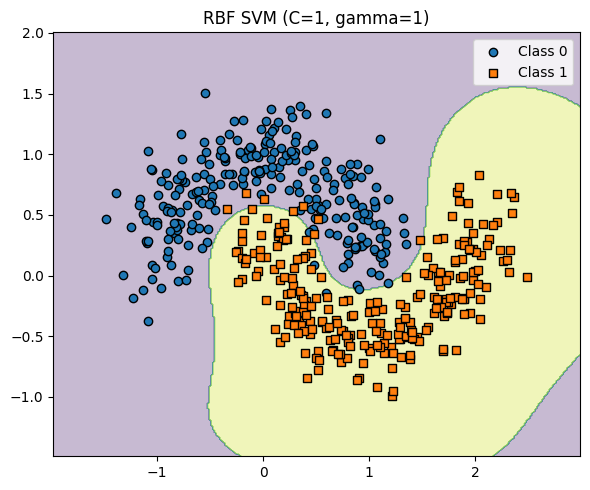


RBF SVM with C=1, gamma=5
  Train accuracy: 0.98
  Test accuracy : 0.98


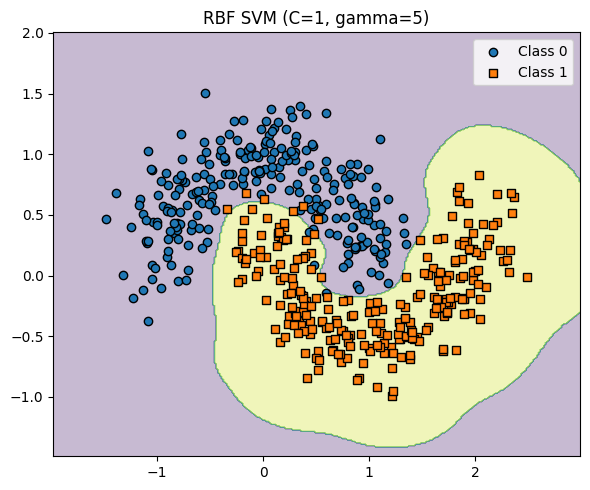


RBF SVM with C=10, gamma=0.1
  Train accuracy: 0.9285714285714286
  Test accuracy : 0.9333333333333333


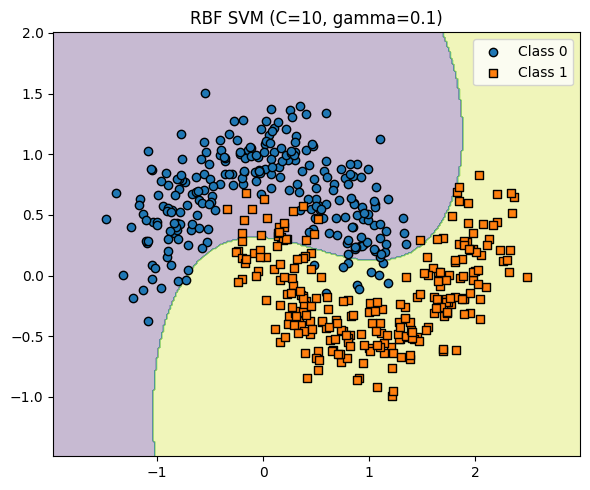


RBF SVM with C=10, gamma=1
  Train accuracy: 0.98
  Test accuracy : 0.9733333333333334


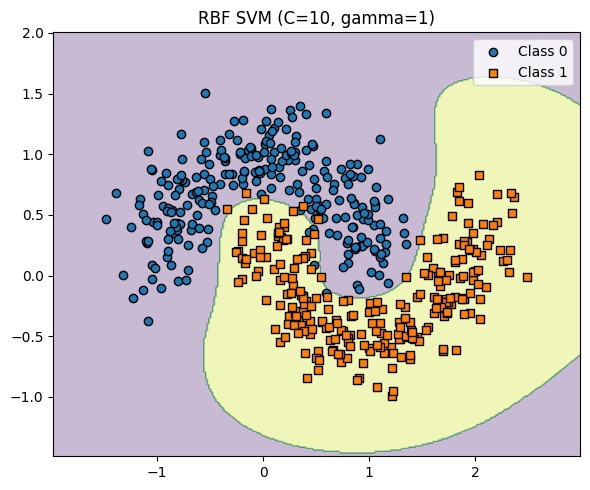


RBF SVM with C=10, gamma=5
  Train accuracy: 0.9885714285714285
  Test accuracy : 0.9533333333333334


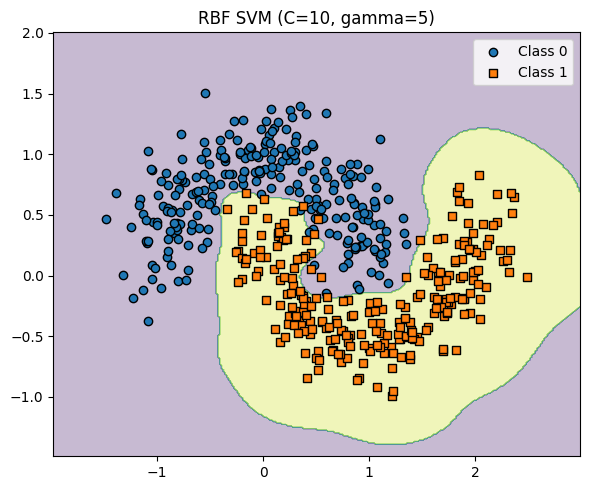


RBF SVM with C=100, gamma=0.1
  Train accuracy: 0.9714285714285714
  Test accuracy : 0.9733333333333334


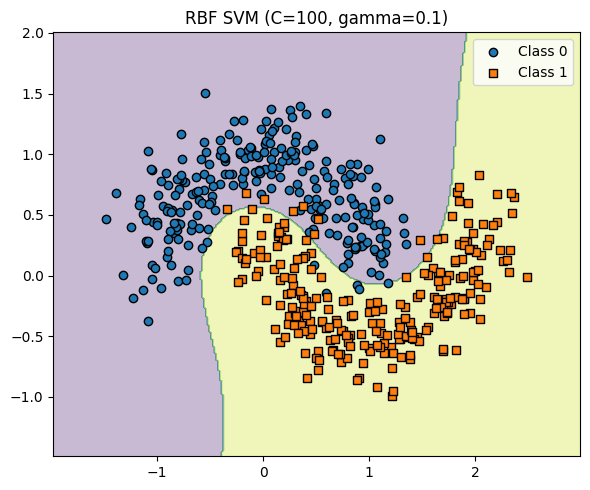


RBF SVM with C=100, gamma=1
  Train accuracy: 0.9885714285714285
  Test accuracy : 0.9666666666666667


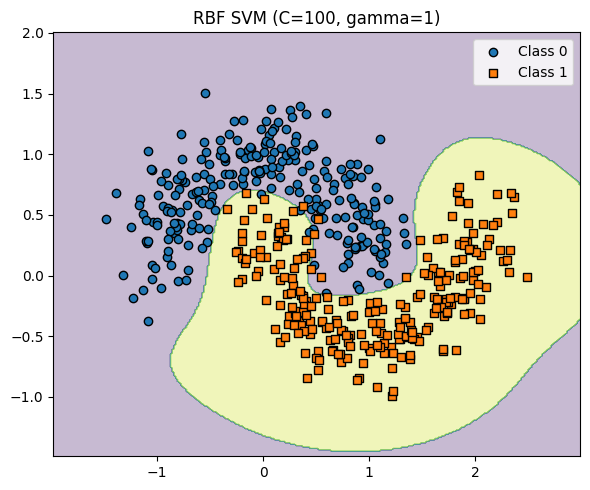


RBF SVM with C=100, gamma=5
  Train accuracy: 0.9942857142857143
  Test accuracy : 0.96


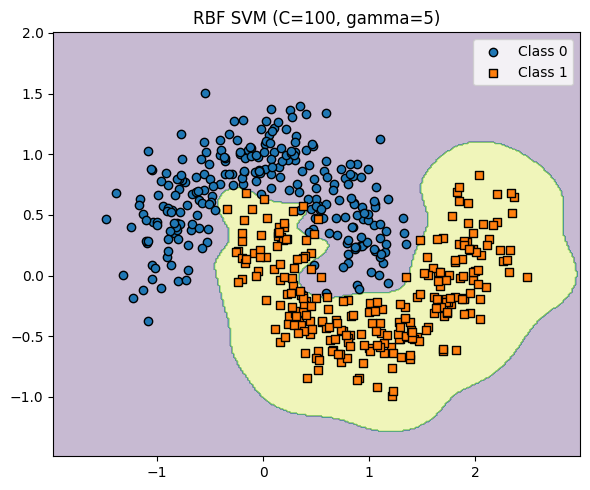

In [20]:
C_values = [0.1, 1, 10, 100]
gamma_values = [0.1, 1, 5]

for C in C_values:
    for gamma in gamma_values:
        rbf_svm = Pipeline([
            ("scaler", StandardScaler()),
            ("svm", SVC(kernel="rbf", C=C, gamma=gamma, random_state=42))
        ])
        rbf_svm.fit(X_train, y_train)

        y_pred_train = rbf_svm.predict(X_train)
        y_pred_test = rbf_svm.predict(X_test)

        print(f"\nRBF SVM with C={C}, gamma={gamma}")
        print("  Train accuracy:", accuracy_score(y_train, y_pred_train))
        print("  Test accuracy :", accuracy_score(y_test, y_pred_test))

        plot_decision_boundary(
            rbf_svm, X, y,
            title=f"RBF SVM (C={C}, gamma={gamma})"
        )



Polynomial kernel (degree=2)
  Train accuracy: 0.52
  Test accuracy : 0.47333333333333333


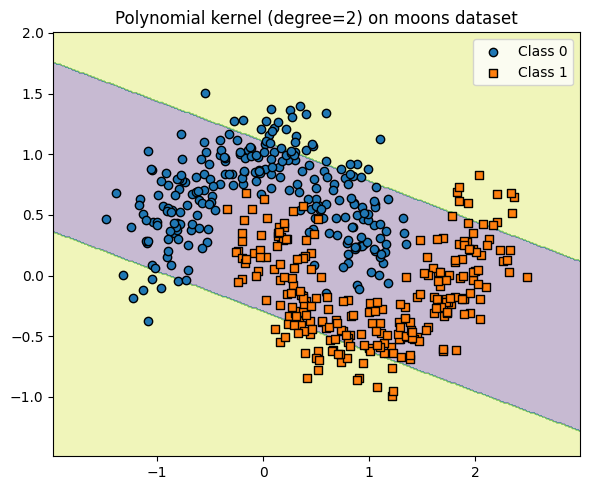


Polynomial kernel (degree=5)
  Train accuracy: 0.8771428571428571
  Test accuracy : 0.9


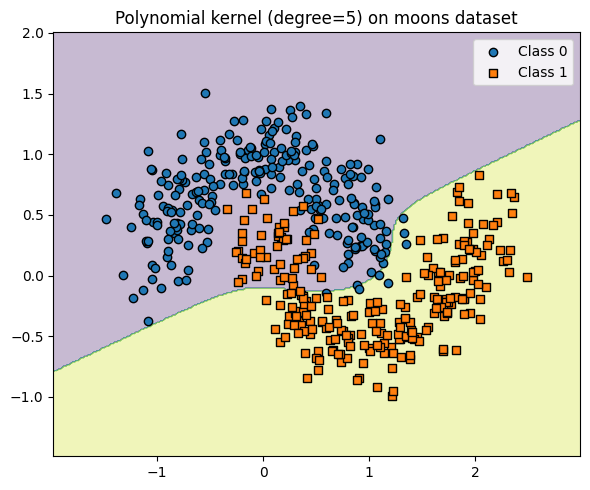

In [21]:
# Polynomial kernel SVM: degree 2 and 5
poly_svm_deg2 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="poly", degree=2, C=1.0, gamma="scale", random_state=42))
])

poly_svm_deg5 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="poly", degree=5, C=1.0, gamma="scale", random_state=42))
])

for clf, name in [(poly_svm_deg2, "Polynomial kernel (degree=2)"),
                  (poly_svm_deg5, "Polynomial kernel (degree=5)")]:
    clf.fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

    print(f"\n{name}")
    print("  Train accuracy:", accuracy_score(y_train, y_pred_train))
    print("  Test accuracy :", accuracy_score(y_test, y_pred_test))

    plot_decision_boundary(clf, X, y, title=name + " on moons dataset")

In [22]:
from sklearn.model_selection import train_test_split, GridSearchCV


Best parameters: {'svm__C': 10, 'svm__gamma': 1}
Best CV score : 0.9771428571428572
Test accuracy with best model: 0.9733333333333334


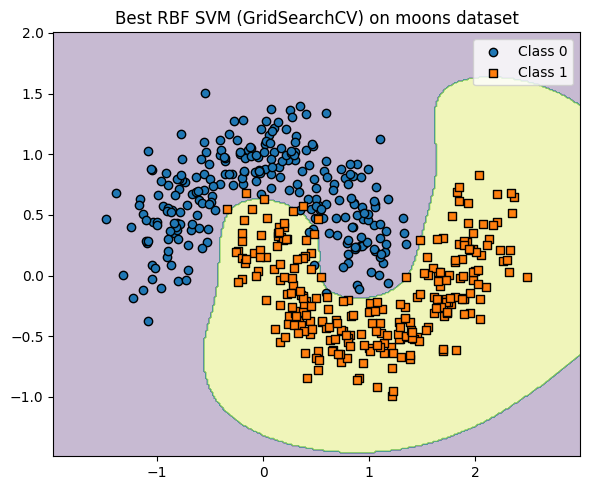

In [23]:
# Grid search for best RBF SVM on the moons dataset

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="rbf", random_state=42))
])

param_grid = {
    "svm__C":    [0.1, 1, 10, 100],
    "svm__gamma": [0.01, 0.1, 1, 10]
}

grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best CV score :", grid.best_score_)

best_model = grid.best_estimator_

y_pred_test_best = best_model.predict(X_test)
print("Test accuracy with best model:", accuracy_score(y_test, y_pred_test_best))

plot_decision_boundary(best_model, X, y,
                       title="Best RBF SVM (GridSearchCV) on moons dataset")


In [ ]:
#resources
#https://www.linkedin.com/posts/rohithr24_what-is-svm-activity-7353228863168045057-0Dmc?utm_source=share&utm_medium=member_desktop&rcm=ACoAAC_dIVABeX8RSU3BcgNMUEYWTgVwLEU-9HE
#https://scikit-learn.org/stable/modules/svm.html
#https://github.com/rohithr8?tab=repositories
#https://github.com/RohithRamesh24?tab=repositories